# Machine Learning with H2O - Tutorial 2: Basic Data Manipulation

<hr>

**Objective**:

- This tutorial demonstrates basic data manipulation with H2O.

<hr>

**Titanic Dataset:**

- Source: https://www.kaggle.com/c/titanic/data

<hr>

**Full Technical Reference:**

- http://docs.h2o.ai/h2o/latest-stable/h2o-r/h2o_package.pdf

<br>


In [1]:
# Start and connect to a local H2O cluster
suppressPackageStartupMessages(library(h2o))
h2o.init(nthreads = -1)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    /tmp/Rtmpmut9K7/h2o_joe_started_from_r.out
    /tmp/Rtmpmut9K7/h2o_joe_started_from_r.err


Starting H2O JVM and connecting: .. Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 992 milliseconds 
    H2O cluster version:        3.10.3.5 
    H2O cluster version age:    9 days  
    H2O cluster name:           H2O_started_from_R_joe_osm405 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   5.21 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.2 (2016-10-31) 



In [2]:
# Import Titanic data (local CSV)
titanic = h2o.importFile("kaggle_titanic.csv")

  |======================================================================| 100%


In [3]:
# Explore the dataset using various functions
head(titanic, 10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,NaN,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,NaN,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,NaN,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NA,C


<br>

Explain why we need to transform

<br>

In [4]:
# Explore the column 'Survived'
h2o.describe(titanic[, 'Survived'])

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Survived,int,0,549,0,0,0,1,0.383838383838384,0.486592454264857,NA


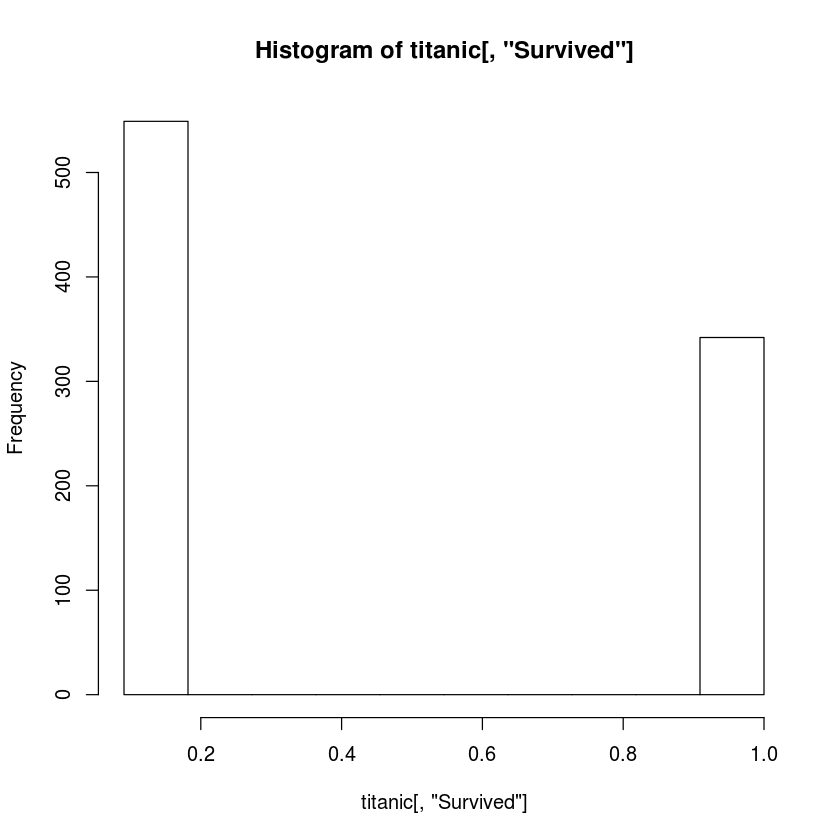

In [5]:
# Use hist() to create a histogram
h2o.hist(titanic[, 'Survived'])

In [6]:
# Use table() to summarize 0s and 1s
h2o.table(titanic[, 'Survived'])

  Survived Count
1        0   549
2        1   342

[2 rows x 2 columns] 

In [7]:
# Convert 'Survived' to categorical variable
titanic[, 'Survived'] = as.factor(titanic[, 'Survived'])

In [8]:
# Look at the summary of 'Survived' again
# The feature is now an 'enum' (enum is the name of categorical variable in Java)
h2o.describe(titanic[, 'Survived'])

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Survived,enum,0,549,0,0,0,1,0.383838383838384,0.486592454264857,2


<br>

Doing the same for 'Pclass'

<br>

In [9]:
# Explore the column 'Pclass'
h2o.describe(titanic[,'Pclass'])

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Pclass,int,0,0,0,0,1,3,2.30864197530864,0.836071240977049,NA


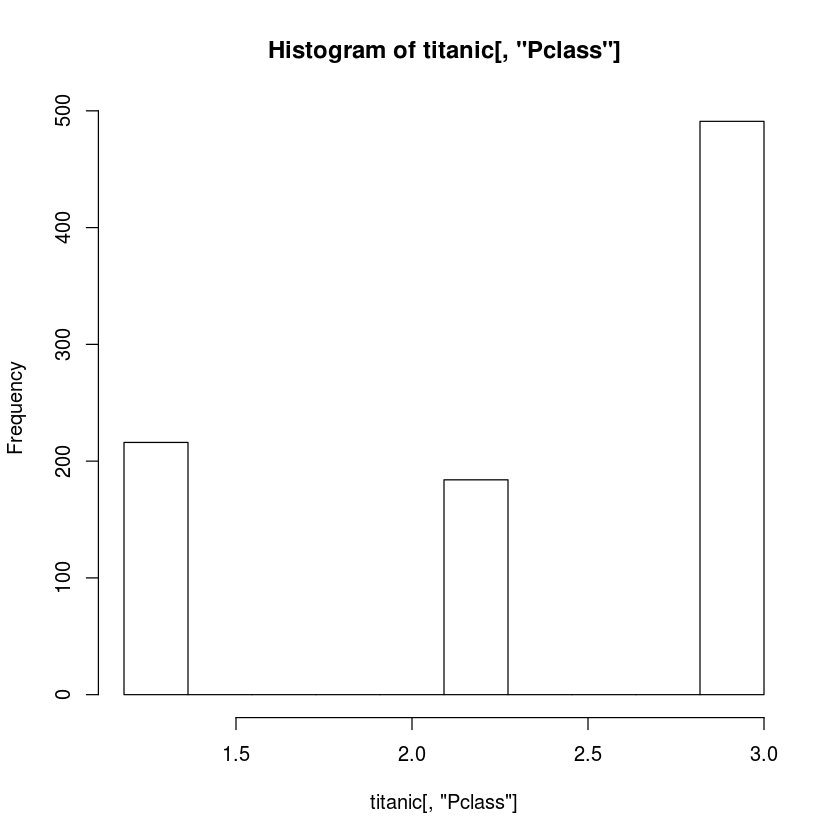

In [10]:
# Use hist() to create a histogram
h2o.hist(titanic[, 'Pclass'])

In [11]:
# Use table() to summarize 1s, 2s and 3s
h2o.table(titanic[, 'Pclass'])

  Pclass Count
1      1   216
2      2   184
3      3   491

[3 rows x 2 columns] 

In [12]:
# Convert 'Pclass' to categorical variable
titanic[, 'Pclass'] = as.factor(titanic[, 'Pclass'])

In [13]:
# Look at the summary of 'Pclass' again
# The feature is now an 'enum' (enum is the name of categorical variable in Java)
h2o.describe(titanic[, 'Pclass'])

Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
Pclass,enum,0,216,0,0,0,2,NA,NA,3
